# 向量化字符串操作基础

* 大多数 Pandas 的字符串方法借鉴了 Python 字符串内建函数的内容

## 计算长度

In [1]:
import pandas as pd
import numpy as np
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
s

0                 lower
1              CAPITALS
2    this is a sentence
3              SwApCaSe
dtype: object

In [2]:
s.str.len() #字符串长度

0     5
1     8
2    18
3     8
dtype: int64

## 字符转换

* 大小写

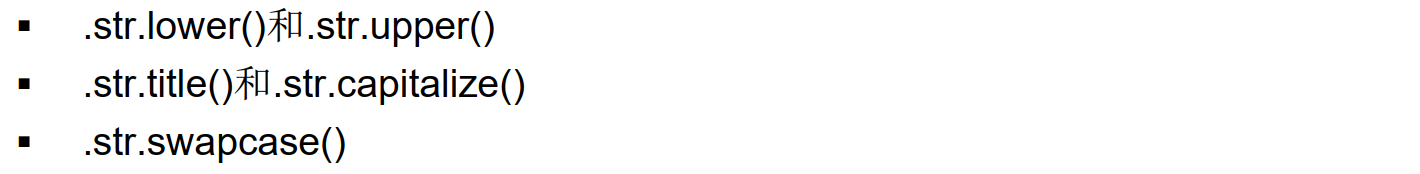

In [3]:
import pandas as pd
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
s

0                 lower
1              CAPITALS
2    this is a sentence
3              SwApCaSe
dtype: object

In [4]:
s.str.lower() 

0                 lower
1              capitals
2    this is a sentence
3              swapcase
dtype: object

In [5]:
s.str.upper()

0                 LOWER
1              CAPITALS
2    THIS IS A SENTENCE
3              SWAPCASE
dtype: object

In [7]:
s

0                 lower
1              CAPITALS
2    this is a sentence
3              SwApCaSe
dtype: object

In [9]:
s.str.title() 

0                 Lower
1              Capitals
2    This Is A Sentence
3              Swapcase
dtype: object

In [10]:
s.str.capitalize()

0                 Lower
1              Capitals
2    This is a sentence
3              Swapcase
dtype: object

In [11]:
s.str.swapcase()

0                 LOWER
1              capitals
2    THIS IS A SENTENCE
3              sWaPcAsE
dtype: object

## 字符检索

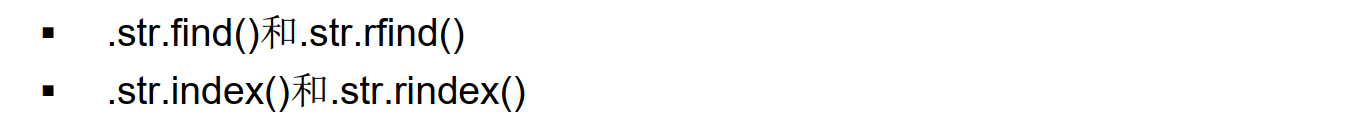

In [12]:
s = pd.Series(['a_b_c','c_ed_e',np.nan,'f_g_h'])
s

0     a_b_c
1    c_ed_e
2       NaN
3     f_g_h
dtype: object

In [13]:
s.str.get(0)# get() 获取指定位置的字符串

0      a
1      c
2    NaN
3      f
dtype: object

In [14]:
s.str.get(-1)# get() 获取指定位置的字符串

0      c
1      e
2    NaN
3      h
dtype: object

In [15]:
s

0     a_b_c
1    c_ed_e
2       NaN
3     f_g_h
dtype: object

In [16]:
s.str.find('e') #找索引，找不到返回-1

0   -1.0
1    2.0
2    NaN
3   -1.0
dtype: float64

In [17]:
s.str.rfind('e')

0   -1.0
1    5.0
2    NaN
3   -1.0
dtype: float64

In [18]:
s.str.index('') #s.str.index  返回的是索引

0    0.0
1    0.0
2    NaN
3    0.0
dtype: float64

In [19]:
#字符的提取

In [20]:
s = pd.Series(['a','c_ed_e',np.nan,'f_g_h'])
s

0         a
1    c_ed_e
2       NaN
3     f_g_h
dtype: object

In [21]:
s.str.findall("[a-d]")   #findall() 查找所有符合正则表达式的字符，以数组形式返回

0       [a]
1    [c, d]
2       NaN
3        []
dtype: object

In [22]:
#extract() 抽取匹配的字符串出来，注意要加上括号，把你需要抽取的东西标注上
s.str.extract("([a-d])") #找首次出现的

,0
0,a
1,c
2,NaN
3,NaN


In [22]:
s

0         a
1    c_ed_e
2       NaN
3     f_g_h
dtype: object

In [24]:
s.str.match("[a-d]")#match() 检测是否全部匹配给点的字符串或者表达式

0     True
1     True
2      NaN
3    False
dtype: object

## 字符类型判断

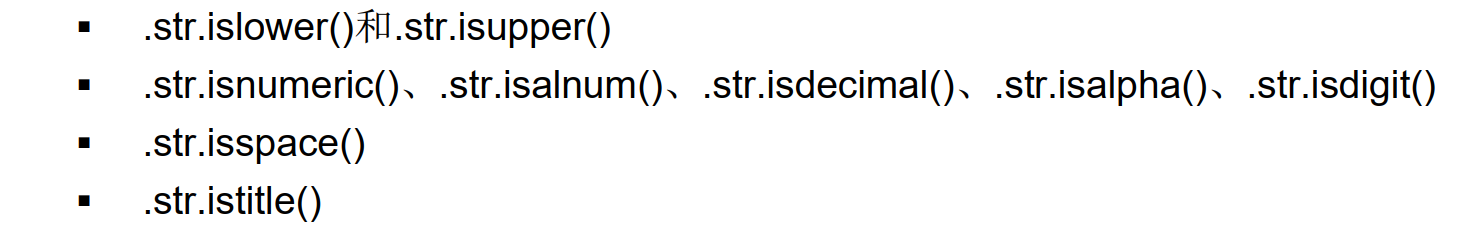

In [23]:
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe','21',' ','12a',])
s

0                 lower
1              CAPITALS
2    this is a sentence
3              SwApCaSe
4                    21
5                      
6                   12a
dtype: object

In [24]:
s.str.islower()

0     True
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

In [25]:
s.str.isupper()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [26]:
s.str.isspace()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

## 字符判断

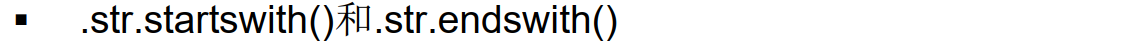

In [27]:
import numpy as np
s = pd.Series(['bat', 'Bear', 'cat', np.nan])
s.str.startswith('b')

0     True
1    False
2    False
3      NaN
dtype: object

In [28]:
s.str.startswith('b', na=False)

0     True
1    False
2    False
3    False
dtype: bool

In [29]:
s.str.endswith('t', na=False)

0     True
1    False
2     True
3    False
dtype: bool

In [30]:
s.str.contains('t')  #contains() 是否包含表达式

0     True
1    False
2     True
3      NaN
dtype: object

## 字符对齐与填充

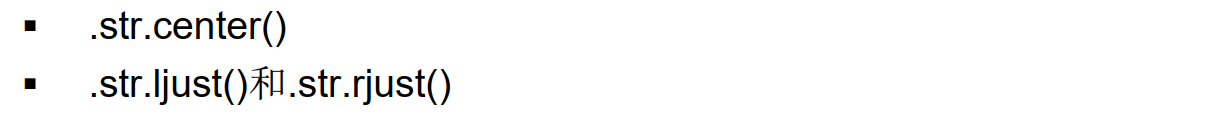

In [31]:
import numpy as np
s = pd.Series(['bat', 'Bear', 'cat', np.nan])
s.str.ljust(10,"*")

0    bat*******
1    Bear******
2    cat*******
3           NaN
dtype: object

In [32]:
s.str.center(10,"*")

0    ***bat****
1    ***Bear***
2    ***cat****
3           NaN
dtype: object

In [33]:
s = pd.Series(['bat', 'Bear', 'cat', np.nan])
s.str.pad(10, side="left",fillchar="*")#pad() 左补齐

0    *******bat
1    ******Bear
2    *******cat
3           NaN
dtype: object

In [34]:
s.str.pad(10, side="right", fillchar="*")#右补齐

0    bat*******
1    Bear******
2    cat*******
3           NaN
dtype: object

In [35]:
s.str.zfill(10) #zfill() 左边补0

0    0000000bat
1    000000Bear
2    0000000cat
3           NaN
dtype: object

## 字符整理

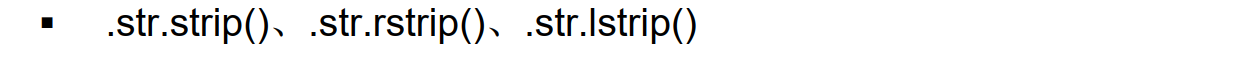

In [36]:
s = pd.Series([' bat ', ' Bear * ', 'cat * ', np.nan])
s.values

array([' bat ', ' Bear * ', 'cat * ', nan], dtype=object)

In [37]:
s.str.strip().str.strip('*').str.strip().values #嵌套

array(['bat', 'Bear', 'cat', nan], dtype=object)

In [38]:
s.str.strip('*  ').values  #去除多个，交替去除，最后结果

array(['bat', 'Bear', 'cat', nan], dtype=object)

## 替换

In [39]:
pd.Series(['foo', 'fuz', np.nan]).str.replace('f', 'b') #替换

0    boo
1    buz
2    NaN
dtype: object

In [40]:
pd.Series(['foo', 'fuz', np.nan]).str.replace('f.', 'ba', regex=True) #替换

0    bao
1    baz
2    NaN
dtype: object

In [41]:
pd.Series(['f.o', 'fuz', np.nan]).str.replace('f.', 'ba', regex=False) #替换

0    bao
1    fuz
2    NaN
dtype: object

## 字符分割

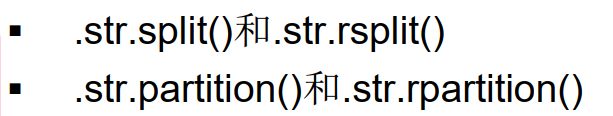

In [57]:
s = pd.Series(['a_b_c_d','c_d_e',np.nan,'f_g_h'])
s

0    a_b_c_d
1      c_d_e
2        NaN
3      f_g_h
dtype: object

In [58]:
s.str.split('_') #split() 切分字符串

0    [a, b, c, d]
1       [c, d, e]
2             NaN
3       [f, g, h]
dtype: object

In [60]:
s.str.split('_',2) #用几个空格分,分几次

0    [a, b, c_d]
1      [c, d, e]
2            NaN
3      [f, g, h]
dtype: object

In [61]:
s

0    a_b_c_d
1      c_d_e
2        NaN
3      f_g_h
dtype: object

In [62]:
s.str.slice(1,3)     #slice() 按给点的开始结束位置切割字符串

0     _b
1     _d
2    NaN
3     _g
dtype: object

In [64]:
s.str.slice_replace(1, 3, "*")
#slice_replace() 使用给定的字符串，替换指定的位置的字符

0    a*_c_d
1      c*_e
2       NaN
3      f*_h
dtype: object

In [66]:
s = pd.Series(['Linda van-der Berg', 'George Pitt-Rivers'])
s.str.partition()  #partition() 把字符串数组切割称为DataFrame，注意切割只是切割称为三部分，分隔符前，分隔符，分隔符后

,0,1,2
0,Linda,,van-der Berg
1,George,,Pitt-Rivers


In [67]:
s.str.partition('-')

,0,1,2
0,Linda van,-,der Berg
1,George Pitt,-,Rivers


## 拼接

In [69]:
s = pd.Series(['a', 'b', np.nan, 'd'])
s

0      a
1      b
2    NaN
3      d
dtype: object

In [68]:
s = pd.Series(['a', 'b', np.nan, 'd'])
s.str.cat(sep=' ')

'a b d'

In [75]:
s.str.cat(['A', 'B', 'C', 'D'], sep=',')  #cat() 拼接字符串

0    a,A
1    b,B
2    NaN
3    d,D
dtype: object

In [76]:
s.str.cat(['A', 'B', 'C', 'D'], sep=',', na_rep='-')

0    a,A
1    b,B
2    -,C
3    d,D
dtype: object

In [70]:
s

0      a
1      b
2    NaN
3      d
dtype: object

In [77]:
t = pd.Series(['d', 'a', 'e', 'c'], index=[3, 0, 4, 2])
s.str.cat(t, join='left', na_rep='-')

0    aa
1    b-
2    -c
3    dd
dtype: object

In [53]:
s

0      a
1      b
2    NaN
3      d
dtype: object

In [54]:
s.str.cat(t, join='inner', na_rep='-')

0    aa
2    -c
3    dd
dtype: object

In [72]:
s = pd.Series([['lion', 'elephant', 'zebra'],
               [1.1, 2.2, 3.3],
               ['cat', np.nan, 'dog'],
               ['cow', 4.5, 'goat'],
               ['duck', ['swan', 'fish'], 'guppy']])
s

0        [lion, elephant, zebra]
1                [1.1, 2.2, 3.3]
2                [cat, nan, dog]
3               [cow, 4.5, goat]
4    [duck, [swan, fish], guppy]
dtype: object

In [74]:
s.str.join('-') #join() 对每个字符都用给定的字符串拼接起

0    lion-elephant-zebra
1                    NaN
2                    NaN
3                    NaN
4                    NaN
dtype: object

## 重复

In [75]:
s = pd.Series(['a', 'b', 'c'])
s

0    a
1    b
2    c
dtype: object

In [59]:
s.str.repeat(repeats=2) #repeat() 重复

0    aa
1    bb
2    cc
dtype: object

In [60]:
s.str.repeat(repeats=[1, 2, 3])

0      a
1     bb
2    ccc
dtype: object

## 统计

In [76]:
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaaSe','21',' ','12a',])
s
#count() 计算给定单词出现的次数

0                 lower
1              CAPITALS
2    this is a sentence
3             SwApCaaSe
4                    21
5                      
6                   12a
dtype: object

In [77]:
s.str.count("a")

0    0
1    0
2    1
3    2
4    0
5    0
6    1
dtype: int64